In [1]:
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/mrhome/amingk/Documents/7TPD/ActStimRL')
from Madule import utils
import arviz as az
from scipy.stats import gaussian_kde

In [2]:
def MAP(posterior_samples):
    # Estimate density
    kde = gaussian_kde(posterior_samples)

    # Evaluate KDE on a grid
    x = np.linspace(min(posterior_samples), max(posterior_samples), 1000)
    density = kde(x)

    # MAP estimate = location of the maximum density
    map_estimate = x[np.argmax(density)]
    return map_estimate, np.max(density)

In [13]:
# Read data fram of participatns
df = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/AllBehData/NoNanOutlierBehAll.csv')


In [3]:
# wirtten main directory  
writeMainScarch = '/mnt/scratch/projects/7TPD/amin'
# name of model
model_name = 'tabel3_model1_complement_prob'
# The adrees name of pickle file
pickelDir_HC = f'{writeMainScarch}/Behavioral/Tabel3/HC/{model_name}_HC_cleanOutlier.pkl'
# pickle file in the scratch folder in PD
pickelDir_PD = f'{writeMainScarch}/Behavioral/Tabel3/PD/{model_name}_PD_cleanOutlier.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl_HC = utils.load_pickle(load_path=pickelDir_HC)
loadPkl_PD = utils.load_pickle(load_path=pickelDir_PD)
fit_HC = loadPkl_HC['fit']
fit_PD = loadPkl_PD['fit']

An exception occurred


TypeError: 'NoneType' object is not subscriptable

In [ ]:
summary = az.summary(fit_HC)

In [15]:
#####################Hierarchical Parameters
# Healthy Control
transfer_hier_alphaAct_pos_mu_HC = fit_HC["transfer_hier_alphaAct_pos_mu"] 
transfer_hier_alphaAct_neg_mu_HC = fit_HC["transfer_hier_alphaAct_neg_mu"] 
transfer_hier_alphaClr_pos_mu_HC = fit_HC["transfer_hier_alphaClr_pos_mu"] 
transfer_hier_alphaClr_neg_mu_HC = fit_HC["transfer_hier_alphaClr_neg_mu"] 
transfer_hier_weight_mu_HC = fit_HC["transfer_hier_weight_mu"] 
transfer_hier_sensitivity_mu_HC = fit_HC["transfer_hier_sensitivity_mu"]

# Parkinson's disease
transfer_hier_alphaAct_pos_mu_PD = fit_PD["transfer_hier_alphaAct_pos_mu"] 
transfer_hier_alphaAct_neg_mu_PD = fit_PD["transfer_hier_alphaAct_neg_mu"] 
transfer_hier_alphaClr_pos_mu_PD = fit_PD["transfer_hier_alphaClr_pos_mu"] 
transfer_hier_alphaClr_neg_mu_PD = fit_PD["transfer_hier_alphaClr_neg_mu"] 
transfer_hier_weight_mu_PD = fit_PD["transfer_hier_weight_mu"] 
transfer_hier_sensitivity_mu_PD = fit_PD["transfer_hier_sensitivity_mu"]


In [16]:
####################################Individual Parameters

# Healthy Control
transfer_weight_HC=fit_HC['transfer_weight']
transfer_alphaAct_pos_HC=fit_HC['transfer_alphaAct_pos']
transfer_alphaAct_neg_HC=fit_HC['transfer_alphaAct_neg']
transfer_alphaClr_pos_HC=fit_HC['transfer_alphaClr_pos']
transfer_alphaClr_neg_HC=fit_HC['transfer_alphaClr_neg']
transfer_sensitivity_HC=fit_HC['transfer_sensitivity']

# Healthy Control
transfer_weight_PD=fit_PD['transfer_weight']
transfer_alphaAct_pos_PD=fit_PD['transfer_alphaAct_pos']
transfer_alphaAct_neg_PD=fit_PD['transfer_alphaAct_neg']
transfer_alphaClr_pos_PD=fit_PD['transfer_alphaClr_pos']
transfer_alphaClr_neg_PD=fit_PD['transfer_alphaClr_neg']
transfer_sensitivity_PD=fit_PD['transfer_sensitivity']



In [17]:
transfer_weight_HC.shape

(21, 2, 2, 9000)

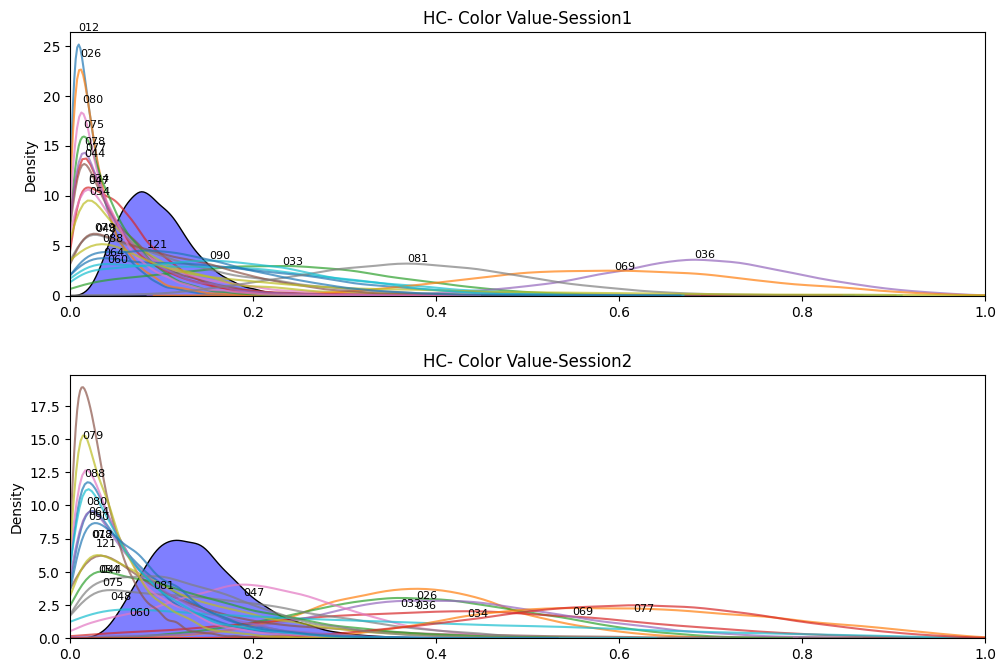

In [18]:
mm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(30*mm, 20*mm))
axs = axs.flatten()

############ Healthy Control

# positive learning rate of action value in Color condition
for i in range(transfer_weight_HC.shape[0]):
    # Session 1
    sns.kdeplot(data=transfer_weight_HC[i,0,1], ax=axs[0], alpha=.7)
    map_apex, dens_apex=MAP(transfer_weight_HC[i,0,1])
    sub_name = df[df['patient']=='HC']['sub_ID'].unique()[i]
    axs[0].text(map_apex, dens_apex/25,  sub_name[4:], transform=axs[0].transAxes, fontsize=8)
    # Session 2
    sns.kdeplot(data=transfer_weight_HC[i,1,1], ax=axs[1], alpha=.7)
    map_apex, dens_apex=MAP(transfer_weight_HC[i,1,1])
    sub_name = df[df['patient']=='HC']['sub_ID'].unique()[i]
    axs[1].text(map_apex, dens_apex/25,  sub_name[4:], transform=axs[1].transAxes, fontsize=8)

# hierarchical parametes
sns.kdeplot(data=transfer_hier_weight_mu_HC[0,1], ax=axs[0], multiple="stack", color='blue', alpha=.5)
sns.kdeplot(data=transfer_hier_weight_mu_HC[1,1], ax=axs[1], multiple="stack", color='blue', alpha=.5)


axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[0].set_title('HC- Color Value-Session1')
axs[1].set_title('HC- Color Value-Session2')

fig.subplots_adjust(wspace=.3, hspace=.3)


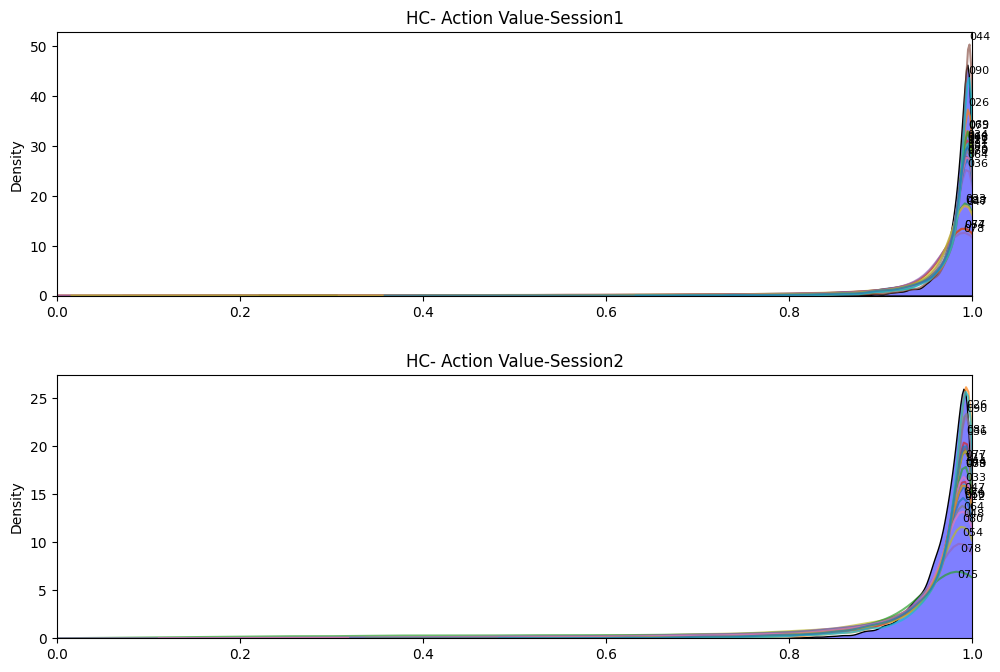

In [19]:
mm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(30*mm, 20*mm))
axs = axs.flatten()

############ Healthy Control

# positive learning rate of action value in Color condition
for i in range(transfer_weight_HC.shape[0]):
    # Session1
    sns.kdeplot(data=transfer_weight_HC[i,0,0], ax=axs[0], alpha=.7)
    map_apex, dens_apex=MAP(transfer_weight_HC[i,0,0])
    sub_name = df[df['patient']=='HC']['sub_ID'].unique()[i]
    axs[0].text(map_apex, dens_apex/52,  sub_name[4:], transform=axs[0].transAxes, fontsize=8)
    #session2 
    sns.kdeplot(data=transfer_weight_HC[i,1,0], ax=axs[1], alpha=.7)
    map_apex, dens_apex=MAP(transfer_weight_HC[i,1,0])
    sub_name = df[df['patient']=='HC']['sub_ID'].unique()[i]
    axs[1].text(map_apex, dens_apex/30,  sub_name[4:], transform=axs[1].transAxes, fontsize=8)

# hierarchical parametes
sns.kdeplot(data=transfer_hier_weight_mu_HC[0,0], ax=axs[0], multiple="stack", color='blue', alpha=.5)
sns.kdeplot(data=transfer_hier_weight_mu_HC[1,0], ax=axs[1], multiple="stack", color='blue', alpha=.5)

axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[0].set_title('HC- Action Value-Session1')
axs[1].set_title('HC- Action Value-Session2')

fig.subplots_adjust(wspace=.3, hspace=.3)


In [20]:
np.sum(transfer_weight_PD[i,0,1]>.5)

IndexError: index 20 is out of bounds for axis 0 with size 18

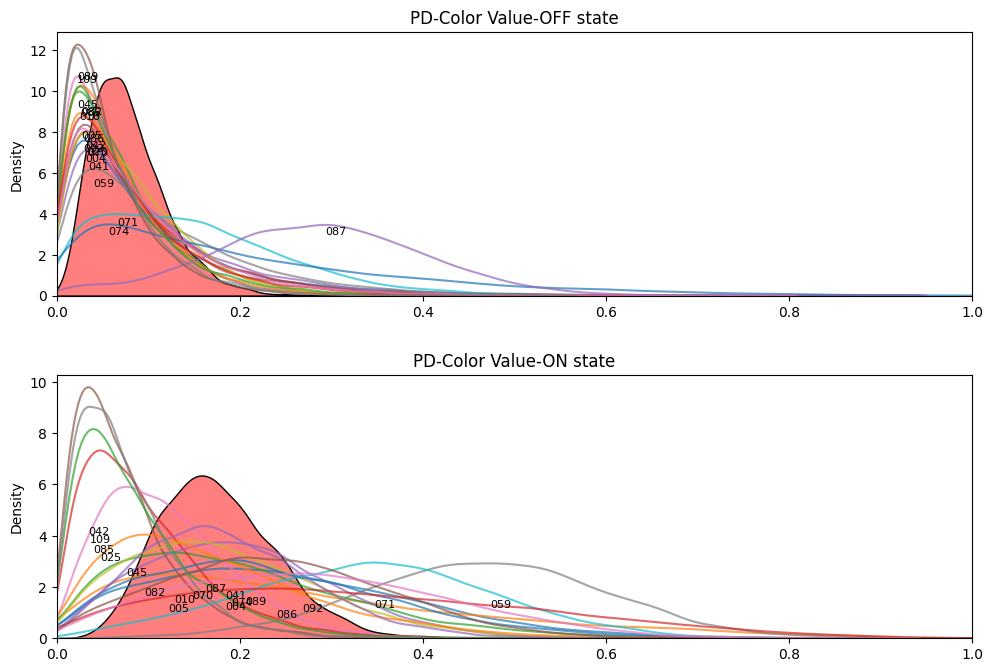

In [21]:
mm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(30*mm, 20*mm))
axs = axs.flatten()

############ Healthy Control

# positive learning rate of action value in Color condition
for i in range(transfer_weight_PD.shape[0]):
    #OFF
    sns.kdeplot(data=transfer_weight_PD[i,0,1], ax=axs[0], alpha=.7)
    map_apex, dens_apex=MAP(transfer_weight_PD[i,0,1])
    sub_name = df[df['patient']=='PD']['sub_ID'].unique()[i]
    axs[0].text(map_apex, dens_apex/15,  sub_name[4:], transform=axs[0].transAxes, fontsize=8)
    #ON
    sns.kdeplot(data=transfer_weight_PD[i,1,1], ax=axs[1], alpha=.7)
    map_apex, dens_apex=MAP(transfer_weight_PD[i,1,1])
    sub_name = df[df['patient']=='PD']['sub_ID'].unique()[i]
    axs[1].text(map_apex, dens_apex/25,  sub_name[4:], transform=axs[1].transAxes, fontsize=8)

# hierarchical parametes
sns.kdeplot(data=transfer_hier_weight_mu_PD[0,1], ax=axs[0], multiple="stack", color='red', alpha=.5)
sns.kdeplot(data=transfer_hier_weight_mu_PD[1,1], ax=axs[1], multiple="stack", color='red', alpha=.5)


axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[0].set_title('PD-Color Value-OFF state')
axs[1].set_title('PD-Color Value-ON state')

fig.subplots_adjust(wspace=.3, hspace=.3)


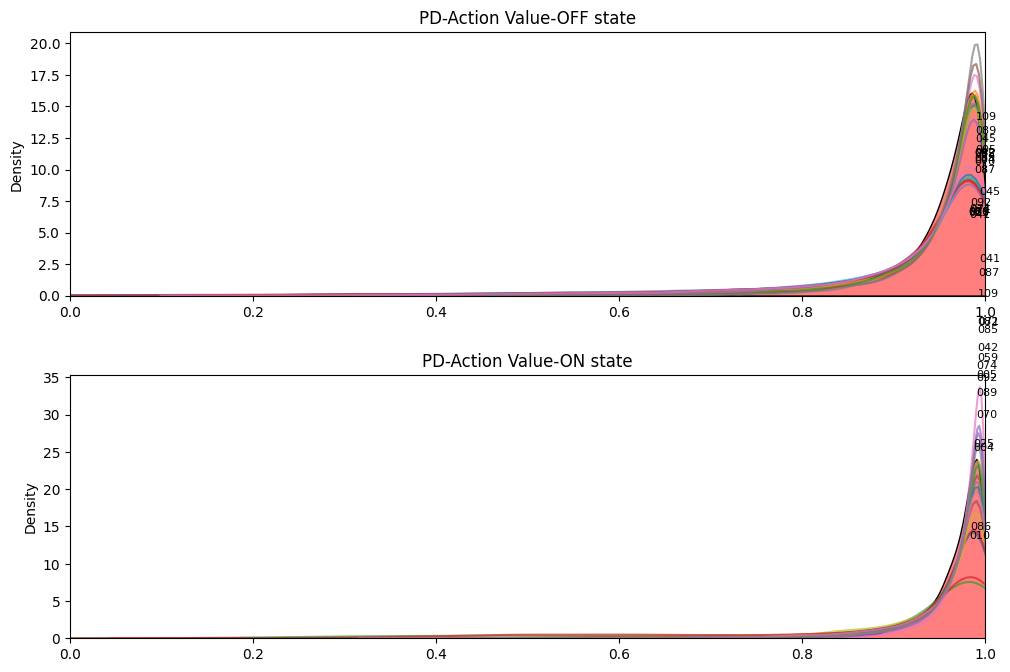

In [22]:
mm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(30*mm, 20*mm))
axs = axs.flatten()

############ Healthy Control

# positive learning rate of action value in Color condition
for i in range(transfer_weight_PD.shape[0]):
    # OFF
    sns.kdeplot(data=transfer_weight_PD[i,0,0], ax=axs[0], alpha=.7)
    map_apex, dens_apex=MAP(transfer_weight_PD[i,0,0])
    sub_name = df[df['patient']=='PD']['sub_ID'].unique()[i]
    axs[0].text(map_apex, dens_apex/30,  sub_name[4:], transform=axs[0].transAxes, fontsize=8)
    #ON
    sns.kdeplot(data=transfer_weight_PD[i,1,0], ax=axs[1], alpha=.7)
    map_apex, dens_apex=MAP(transfer_weight_PD[i,1,0])
    sub_name = df[df['patient']=='PD']['sub_ID'].unique()[i]
    axs[1].text(map_apex, dens_apex/20,  sub_name[4:], transform=axs[1].transAxes, fontsize=8)

# hierarchical parametes
sns.kdeplot(data=transfer_hier_weight_mu_PD[0,0], ax=axs[0], multiple="stack", color='red', alpha=.5)
sns.kdeplot(data=transfer_hier_weight_mu_PD[1,0], ax=axs[1], multiple="stack", color='red', alpha=.5)


axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[0].set_title('PD-Action Value-OFF state')
axs[1].set_title('PD-Action Value-ON state')

fig.subplots_adjust(wspace=.3, hspace=.3)


In [27]:
#Outlier of weighting Parameters for HC -Color Value-session1
for i in range(len(transfer_weight_HC)):
    map_apex, dens_apex = MAP(transfer_weight_HC[i,0,1])
    if map_apex>.7:
        print(i, ': ', df[df['patient']=='HC']['sub_ID'].unique()[i])

2 :  sub-030


In [24]:
#Outlier of weighting Parameters for HC -Color Value-session2
for i in range(len(transfer_weight_HC)):
    map_apex, dens_apex = MAP(transfer_weight_HC[i,1,1])
    if map_apex>.7:
        print(i, ': ', df[df['patient']=='HC']['sub_ID'].unique()[i])

2 :  sub-030
12 :  sub-067


In [22]:
#Outlier of weighting Parameters for PD -Color Value-OFF
for i in range(len(transfer_weight_PD)):
    map_apex, dens_apex = MAP(transfer_weight_PD[i,0,1])
    if map_apex>.7:
        print(i, ': ', df[df['patient']=='PD']['sub_ID'].unique()[i])

9 :  sub-052
10 :  sub-056
12 :  sub-065
22 :  sub-108


In [23]:
#Outlier of weighting Parameters for PD -Color Value-ON
for i in range(len(transfer_weight_PD)):
    map_apex, dens_apex = MAP(transfer_weight_PD[i,1,1])
    if map_apex>.7:
        print(i, ': ', df[df['patient']=='PD']['sub_ID'].unique()[i])

5 :  sub-040
9 :  sub-052
22 :  sub-108


In [ ]:
#Outlier of weighting Parameters for PD -Action Value-OFF
for i in range(len(transfer_weight_PD)):
    map_apex, dens_apex = MAP(transfer_weight_PD[i,0,0])
    if map_apex<.3:
        print(i, ': ', df[df['patient']=='PD']['sub_ID'].unique()[i])

4 :  sub-029


In [26]:
#Outlier of weighting Parameters for PD -Action Value-ON
for i in range(len(transfer_weight_PD)):
    map_apex, dens_apex = MAP(transfer_weight_PD[i,1,0])
    if map_apex<.3:
        print(i, ': ', df[df['patient']=='PD']['sub_ID'].unique()[i])

4 :  sub-029
